In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages : Annotated[list,add_messages]

graph_builder = StateGraph(State)


- node is a function or a component

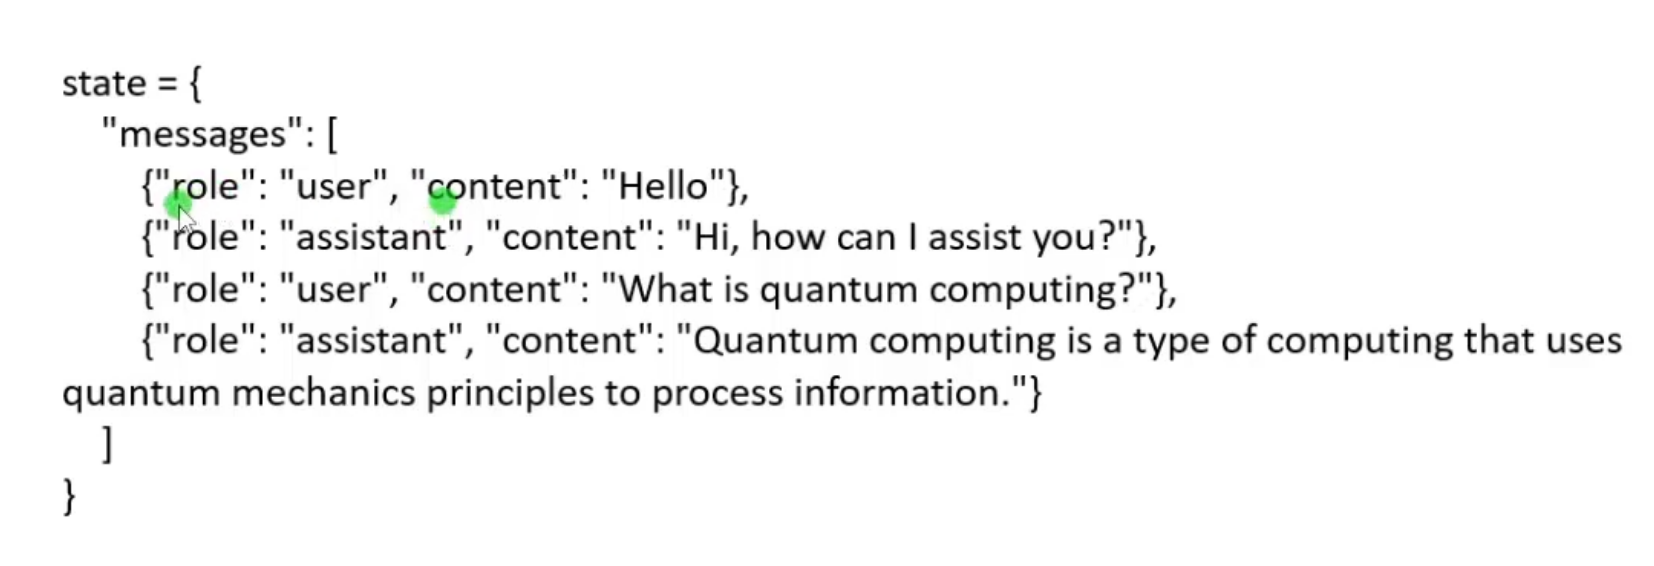

Each node can receive the current State as input and output an update to the state.
Updates to messages will be appended to the existing list rather than overwriting it, thanks to the prebuilt add_messages function used with the Annotated syntax

In [8]:
# pip install --upgrade langchain langchain-community langgraph

# pip install langchain-openai 

In [7]:


from typing import List, Dict
from langgraph.graph import StateGraph, START, END
from langchain_ollama.llms import OllamaLLM


# Step 1: Define State
class State(Dict):
    messages: List[Dict[str, str]] 


# Step 2: Initialize StateGraph
graph_builder = StateGraph(State)

from langchain_openai import ChatOpenAI




# Initialize OpenAI model with direct API key
llm = ChatOpenAI(model="gpt-4o-mini", api_key=OPENAI_API_KEY)

# Define chatbot function
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    state["messages"].append({"role": "assistant", "content": response})  # Treat response as a string
    return {"messages": state["messages"]}



# Add nodes and edges
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)


# Compile the graph
graph = graph_builder.compile()


# Stream updates
def stream_graph_updates(user_input: str):    
    state = {"messages": [{"role": "user", "content": user_input}]}
    for event in graph.stream(state):
        for value in event.values():
            print("Assistant:", value["messages"][-1]["content"])



# Run chatbot in a loop
if __name__ == "__main__":
    try:
        user_input = "Hello what is a AI Agent"
        stream_graph_updates(user_input)
    except Exception as e:
            print(f"An error occurred: {e}")


Assistant: content='An AI agent is a software program or system that uses artificial intelligence techniques to perform tasks, make decisions, or take actions in an environment. These agents can operate autonomously or semi-autonomously, relying on algorithms, machine learning models, and other AI methodologies to perceive their surroundings, process information, and respond to stimuli.\n\nAI agents can vary widely in complexity and application. Some common types include:\n\n1. **Chatbots:** These are conversational agents that interact with users via text or voice, often used for customer service or information retrieval.\n\n2. **Autonomous Vehicles:** AI agents that navigate and control vehicles without human intervention, using sensors and algorithms to interpret data about their environment.\n\n3. **Recommendation Systems:** These agents analyze user behavior and preferences to suggest products, services, or content, commonly used in e-commerce and streaming platforms.\n\n4. **Robo

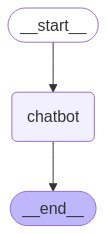

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass